### Introduction to Options and Put-Call Parity

#### European Options

Options are financial derivatives that give buyers the right, but not the obligation, to buy or sell an underlying asset at a predetermined price, known as the strike price, before a specified expiration date.

##### European Call and Put Options

- **Call Option**: Gives the holder the right to buy the underlying asset at the strike price.
- **Put Option**: Gives the holder the right to sell the underlying asset at the strike price.

##### Long and Short Positions

- **Long Position (Buying an Option)**: The buyer of the option holds a long position. They have the right to exercise the option.
- **Short Position (Selling/Writing an Option)**: The seller or writer of the option holds a short position. They have the obligation to fulfill the contract if the buyer exercises the option.

##### Profit Equations for European Options

The profit for options can be calculated as follows:

- **Call Option Profit**: 
  $$\text{Profit} = \max(S_T - K, 0) - \text{Premium}$$
  Where $S_T$ is the spot price of the underlying asset at expiration, $K$ is the strike price, and $\text{Premium}$ is the price paid for the option.

- **Put Option Profit**:
  $$\text{Profit} = \max(K - S_T, 0) - \text{Premium}$$
  Where $S_T$ is the spot price of the underlying asset at expiration, $K$ is the strike price, and $\text{Premium}$ is the price paid for the option.

#### Put-Call Parity

The put-call parity is a principle in options pricing that describes the relationship between the prices of European call and put options with the same underlying asset, strike price, and expiration date.

The put-call parity equation is given by:

$$C + Ke^{-r(T-t)} = P + S_t$$

Where:
- $C$ is the price of the European call option
- $P$ is the price of the European put option
- $K$ is the strike price
- $r$ is the risk-free interest rate
- $T-t$ is the time to expiration
- $S_t$ is the current spot price of the underlying asset

This equation demonstrates that the value of a portfolio consisting of a long call and a short put with the same strike price and expiration date should be equal to the value of a portfolio consisting of the underlying asset and a risk-free bond with a face value equal to the strike price.



In [1]:
# Code to calculate put-call parity and determine if an arbitrage opportunity exists
import numpy as np
# Given values
C = 9  # Price of the call option
P = 4  # Price of the put option
E = 60  # Strike price
S = 70  # Current stock price
r = 0.05  # Interest rate
T = 1  # Time to expiration in years

# Calculate the present value of the strike price
E_discounted = E * np.exp(-r * T)

# Calculate the left-hand side (LHS) and right-hand side (RHS) of the equation
LHS = C + E_discounted
RHS = P + S

# Determine if there is an arbitrage opportunity and suggest strategy
if LHS > RHS:
    # LHS is overpriced, sell the call, buy the put, and invest the strike price at risk-free rate
    arbitrage_amount = LHS - RHS
    strategy = f"Sell the call option for ${C:.2f}, buy the put option for ${P:.2f}, take out a loan of ${E_discounted:.2f}, buy the stock at ${S:.2f} "
elif LHS < RHS:
    # RHS is overpriced, buy the call, sell the put, and borrow the strike price at risk-free rate
    arbitrage_amount = RHS - LHS
    strategy = f"Buy the call option for ${C:.2f}, sell the put option for ${P:.2f}, sell (short) the stock at ${S:.2f}, invest ${E_discounted:.2f} in the risk free asset."
else:
    # No arbitrage opportunity exists
    arbitrage_amount = 0
    strategy = "No arbitrage opportunity is available."

print(f"Arbitrage opportunity of ${arbitrage_amount:.2f} exists.")
print("Strategy:", strategy)


Arbitrage opportunity of $7.93 exists.
Strategy: Buy the call option for $9.00, sell the put option for $4.00, sell (short) the stock at $70.00, invest $57.07 in the risk free asset.


Let
$ dS_t= \mu(S_t, t) dt +\sigma(S_t, t) dW_t. $ (A special case is geometric brownian motion, $dS_t= \mu \cdot S_t dt +\sigma\cdot S_t dW_t$)

## Ito's Lemma

Let $V(x,t) \in C^{2,1}$ (Twice Differentiable in x and once differentiable in t).

The $V(S_t, t)$ has the following dynamics:

$$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial x} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial x^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial x} dW_t $$

## General Black-Scholes PDE
Let $V(S_t, t)$ be the price of an option at time t. Then
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2(S_t, t)  \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

### Black-Scholes Formula for a European Call and Put Option

The price of a European call option $C$ is given by:

$$ C_E(S,t) = S(t) \cdot N(d_1) - e^{-r(T-t)} E\cdot N(d_2) $$


Similarly, the price of a European put option $p(t)$ is given by:

$$ P_E(S,t) = e^{-r(T-t)} E \cdot N(-d_2) - S(t) \cdot N(-d_1) $$


where:

- $S(t)$: Stock price at time $t$
- $E$: Strike price of the option
- $T$: Time to expiration
- $r$: Risk-free interest rate
- $N(x)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are calculated as:

$$ d_1 = \frac{\ln(S(t) / E) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}} $$
$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$: Volatility (Standard Deviation) of the stock's returns

In [2]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, E, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European call option.

    Parameters:
    S0 (float): Current stock price
    E (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the call option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / E) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    call_price = (S0 * norm.cdf(d1)) - (E * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, E, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European put option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the put option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 /E) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    put_price = -(S0 * norm.cdf(-d1)) + (E * np.exp(-r * T) * norm.cdf(-d2))
    return put_price

# Given data
S0 = 50    # Current stock price
E = 50       # Strike price
T = 0.5      # Time to expiration in years
r = 0.01   # Risk-free interest rate 
sigma = 0.10 # Volatility of the stock 

# Calculate the call option price
call_option_price = black_scholes_call(S0, E, T, r, sigma)
put_option_price = black_scholes_put(S0, E, T, r, sigma)
call_option_price, put_option_price

(1.5348652546134858, 1.2854892142476047)

### Derivatives of Black Scholes Formula
The Greeks measure the sensitivity of option prices to various factors. 

#### Delta ($\Delta=\frac{\partial V}{\partial S}$)
- Measures the rate of change of the option price with respect to changes in the underlying asset's price.
- For call options: $\Delta = N(d_1)$
- For put options: $\Delta = N(d_1) - 1$

#### Gamma ($\Gamma=\frac{\partial^2 V}{\partial S^2}$)
- Measures the rate of change in Delta with respect to changes in the underlying asset's price.
- $\Gamma = \frac{N'(d_1)}{S \sigma \sqrt{T-t}}$

#### Theta ($\Theta=\frac{\partial V}{\partial t}=-\frac{\partial V}{\partial \tau} $) $(\tau:=T-t)$
- Measures the rate of change of the option price with respect to time (time decay).
- Call options: $\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T-t}} - r E e^{-r(T-t)} N(d_2)$
- Put options: $\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T-t}} + r E e^{-r(T-t)} N(-d_2)$

#### Vega ($\nu=\frac{\partial V}{\partial \sigma}$)
- Measures the rate of change of the option price with respect to volatility of the underlying asset.
- $\nu = S \sqrt{T-t} N'(d_1)$

#### Rho ($\rho=\frac{\partial V}{\partial r}$)
- Measures the rate of change of the option price with respect to the risk-free interest rate.
- For call options: $\rho = (T-t) E e^{-r(T-t)} N(d_2)$
- For put options: $\rho = -(T-t) E e^{-r(T-t)} N(-d_2)$

In [4]:
from scipy.stats import norm
import numpy as np

def european_option_price_and_greeks(S, E, T, r, sigma, option_type):
    """
    Calculate the price and Greeks for a European call or put option.
    
    Parameters:
    S (float): Current stock price
    E (float): Strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock
    option_type (str): 'call' or 'put'
    
    Returns:
    tuple: Option price, Delta, Gamma, Theta, Vega, Rho
    """
    # Calculate d1 and d2
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * E * np.exp(-r * T) * norm.cdf(d2)
        rho = T * E * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = E * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        delta = norm.cdf(d1) - 1
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * E * np.exp(-r * T) * norm.cdf(-d2)
        rho = -T * E * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Must be 'call' or 'put'.")
    
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    
    return price, delta, gamma, theta, vega, rho

# Example usage
S0 = 100 # Current stock price
T = 1 # Time to expiration
r = 0.05 # Risk-free interest rate
sigma = 0.1 # Volatility of the stock
E = 100 # Strike price

# Calculate call option price and Greeks
call_price, call_delta, call_gamma, call_theta, call_vega, call_rho = european_option_price_and_greeks(S0, E, T, r, sigma, 'call')
print(f"Call Price: {call_price:.4f}, Delta: {call_delta:.4f}, Gamma: {call_gamma:.4f}, Theta: {call_theta:.4f}, Vega: {call_vega:.4f}, Rho: {call_rho:.4f}")

# Calculate put option price and Greeks
put_price, put_delta, put_gamma, put_theta, put_vega, put_rho = european_option_price_and_greeks(S0, E, T, r, sigma, 'put')
print(f"Put Price: {put_price:.4f}, Delta: {put_delta:.4f}, Gamma: {put_gamma:.4f}, Theta: {put_theta:.4f}, Vega: {put_vega:.4f}, Rho: {put_rho:.4f}")

Call Price: 6.8050, Delta: 0.7088, Gamma: 0.0343, Theta: -4.9187, Vega: 34.2944, Rho: 64.0791
Put Price: 1.9279, Delta: -0.2912, Gamma: 0.0343, Theta: -0.1625, Vega: 34.2944, Rho: -31.0439


### Distribution of GBM

For geometric browian motion $$ dX_t = \mu X_t dt + \sigma X_t dW_t, $$ we have  has the distribution of a log-normal pdf with parameters $\mu_1$ and $\sigma^2_1$ at time $T$ given $X(t)$
$$ f_{X_T}(x) = \frac{1}{x \sigma_1 \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu_1)^2}{2\sigma_1^2}} $$

where 
$$\mu_1=\ln[X(t)]+(\mu-\frac{1}{2}\sigma^2)(T-t)$$
and 
$$\sigma_1^2=\sigma^2(T-t)$$

The mode of the log-normal distribution (Most likely value):

$$ x = e^{\mu_1 - \sigma_1^2} $$

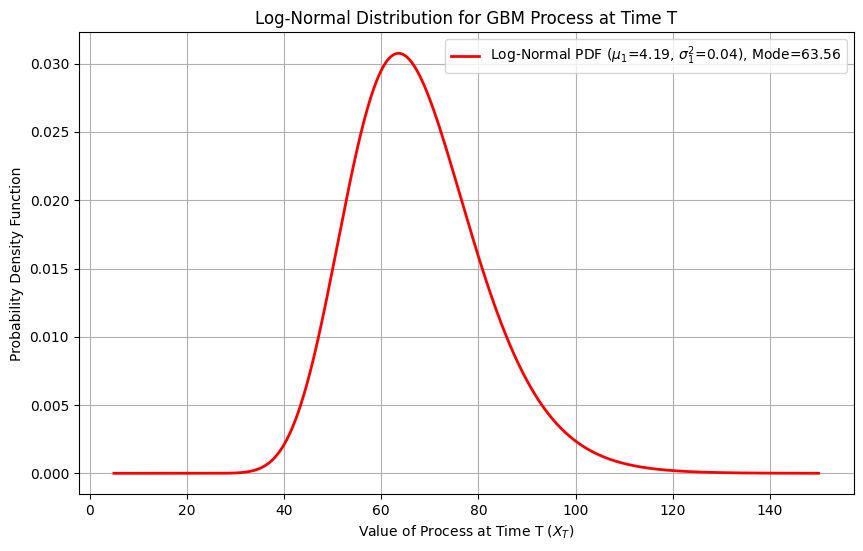

In [6]:
# Plot lognormal distribution for GBM process and find mode
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t):
    """
    Plot the log-normal distribution for a GBM process at time T.

    Parameters:
    X_t (float): The value of the process at time t.
    mu (float): Drift coefficient of the GBM process.
    sigma (float): Volatility coefficient of the GBM process.
    T_minus_t (float): Time difference between T and t.
    """
    # Calculate mu_1 and sigma_1^2
    mu_1 = np.log(X_t) + (mu - 0.5 * sigma**2) * T_minus_t
    sigma_1 = sigma * np.sqrt(T_minus_t)

    # Define the range for x values
    x = np.linspace(X_t * 0.1, X_t * 3, 1000)  # From 10% of X_t to 300% of X_t

    # Calculate the PDF of the log-normal distribution
    pdf = (1 / (x * sigma_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mu_1) / sigma_1) ** 2)

    # Calculate the mode
    mode= np.exp(mu_1 - sigma_1**2)
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'r-', lw=2, label=f'Log-Normal PDF ($\mu_1$={mu_1:.2f}, $\sigma_1^2$={sigma_1**2:.2f}), Mode={mode:.2f}')
    plt.title('Log-Normal Distribution for GBM Process at Time T')
    plt.xlabel('Value of Process at Time T ($X_T$)')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
X_t = 50  # Value of the process at time t
mu = .3  # Drift coefficient
sigma = .2  # Volatility coefficient
T_minus_t = 1  # One year difference

plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t)

In [25]:
#Calculates CDF of log normal distribution
import numpy as np
from scipy.stats import norm

def gbm_lognormal_cdf(x, X_t, mu, sigma, T_minus_t):
    """
    Calculate the cumulative distribution function (CDF) of a log-normal variable
    for a geometric Brownian motion (GBM) process at a future time.
    
    Parameters:
    x (float or array-like): The value(s) at which to evaluate the CDF.
    X_t (float): The value of the process at time t.
    mu (float): Drift coefficient of the GBM process.
    sigma (float): Volatility coefficient of the GBM process.
    T_minus_t (float): Time difference between the future time T and the current time t.
    
    Returns:
    float or array-like: The CDF value(s) at the given x.
    """
    # Calculate the updated parameters for the log-normal distribution
    mu_1 = np.log(X_t) + (mu - 0.5 * sigma**2) * T_minus_t
    sigma_1 = sigma * np.sqrt(T_minus_t)
    
    # Calculate the CDF of the log-normal variable
    cdf = norm.cdf(np.log(x), loc=mu_1, scale=sigma_1)
    
    return cdf

# Example usage
X_t = 110  # Value of the process at time t
mu = 1/8  # Drift coefficient
sigma = 1/2  # Volatility coefficient
T_minus_t = 4  # One year difference

x = np.array([100])  # Values at which to evaluate the CDF

cdf_values = gbm_lognormal_cdf(x, X_t, mu, sigma, T_minus_t)
print("CDF values:", cdf_values)

CDF values: [0.46203423 0.53796577]



### Estimating Realized Volatility

Given historical stock prices $S(n)$ for $N+1$ days, we can estimate daily returns $R_n$ as:

$$ R_n = \frac{S(n) - S(n - 1)}{S(n - 1)} $$

Then, we compute the daily mean return $\hat{\mu}_d$ and daily volatility $\hat{\sigma}_d$:

$$ \hat{\mu}_d = \frac{1}{N} \sum_{n=1}^{N} \ln(1 + R_n) $$
$$ \hat{\sigma}_d = \sqrt{\frac{1}{N - 1} \sum_{n=1}^{N} (\ln(1 + R_n) - \hat{\mu}_d)^2} $$

To annualize these estimates, assuming 252 trading days in a year, the formulas are:

$$ \hat{\mu} = 252 \hat{\mu}_d $$
$$ \hat{\sigma} = \hat{\sigma}_d \sqrt{252} $$



In [ ]:
# Calculate annualized volatility
import numpy as np

def calculate_realized_volatility(prices):
    # Calculate daily returns
    daily_returns = (prices[1:] / prices[:-1]) - 1

    # Calculate the daily mean return
    daily_mean_return = np.mean(np.log(1 + daily_returns))
    print(daily_mean_return*252)

    # Calculate the daily volatility
    variance = sum((np.log(1 + r) - daily_mean_return) ** 2 for r in daily_returns) / (len(daily_returns) - 1)
    daily_volatility=np.sqrt(variance)
    
    # Annualize the volatility
    annualized_volatility = daily_volatility * np.sqrt(252)

    return annualized_volatility

# Sample data: AAPL historical adjusted closing prices
data = np.array([150.00, 152.30, 153.20, 151.80, 152.50, 150.70, 151.25, 152.80, 153.75, 155.00])

# Call the function and print the result
realized_volatility = calculate_realized_volatility(data)
print(f"The realized annualized volatility is: {realized_volatility:.2%}")

### Volatility Smile

#### Implied Volatility

The implied volatility $\sigma_{imp}$ is calculated by inverting the Black-Scholes formula:

$$
\sigma_{imp} = BS^{-1}(S_0, K, r, T, C)
$$

where $S_0$ is the current asset price, $K$ is the strike price, $r$ is the risk-free rate, $T$ is the time to expiration, and $C$ is the market price of the option.

#### Volatility Smile Pattern

The volatility smile refers to the observed pattern of implied volatilities $\sigma_{imp}$ across different strike prices $K$ for options with the same underlying asset and expiration date $T$.

$$
\sigma_{imp} = f(K)
$$

This pattern forms a smile-shaped curve when plotted against the strike price.


In [7]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import newton

# Black-Scholes formula for European call option
def call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for European put option
def put_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Objective function to find the root (implied volatility)
def implied_volatility_objective(sigma, S, K, T, r, market_price, option_type='call'):
    if option_type == 'call':
        return call_option_price(S, K, T, r, sigma) - market_price
    elif option_type == 'put':
        return put_option_price(S, K, T, r, sigma) - market_price

# Function to calculate implied volatility
def calculate_implied_volatility(S, K, T, r, market_price, option_type='call'):
    # Initial guess for volatility
    sigma_initial_guess = 0.2
    # Use Newton-Raphson method to find the root of the objective function
    implied_vol = newton(implied_volatility_objective, sigma_initial_guess, args=(S, K, T, r, market_price, option_type))
    return implied_vol

# Example usage:
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate
market_price = 10  # Market price of the option

# Calculate implied volatility for a call option
implied_vol_call = calculate_implied_volatility(S, K, T, r, market_price, option_type='call')
print(f"Implied Volatility for Call Option: {implied_vol_call:.6f}")

# Calculate implied volatility for a put option
implied_vol_put = calculate_implied_volatility(S, K, T, r, market_price, option_type='put')
print(f"Implied Volatility for Put Option: {implied_vol_put:.6f}")


Implied Volatility for Call Option: 0.187972
Implied Volatility for Put Option: 0.317019


## Dividends in the Black-Scholes Model
- The original Black-Scholes model assumes that the underlying asset pays no dividends
- However, many stocks pay dividends, which affects the price of the options
- Dividends are typically paid out of the company's earnings and distributed to shareholders
- When a stock pays a dividend, its price usually drops by the amount of the dividend on the ex-dividend date
- To account for dividends in the Black-Scholes model, we need to modify the formula

## Black-Scholes Formula with Dividends
The Black-Scholes formula for a European call option with dividends is given by:

$c(t) = S(t)e^{-q(T-t)} \cdot N(d_1) - Xe^{-r(T-t)} \cdot N(d_2)$

where:
- $q$: Continuous dividend yield
- All other variables are the same as in the original Black-Scholes formula

The formula for a European put option with dividends is:

$p(t) = Xe^{-r(T-t)} \cdot N(-d_2) - S(t)e^{-q(T-t)} \cdot N(-d_1)$

The modified $d_1$ and $d_2$ are calculated as:

$d_1 = \frac{\ln(\frac{S(t)}{X}) + (r - q + \frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}$

$d_2 = d_1 - \sigma \sqrt{T-t}$



In [8]:
import numpy as np
from scipy.stats import norm

def black_scholes_dividend(call_put, S, X, T, r, q, sigma):
    """
    Calculates the price of a European call or put option with dividends using the Black-Scholes model.
    
    Parameters:
    call_put (str): 'call' or 'put'
    S (float): Current stock price
    X (float): Strike price
    T (float): Time to expiration (in years)
    r (float): Risk-free interest rate (continuous compounding)
    q (float): Dividend yield (continuous compounding)
    sigma (float): Volatility of the stock's returns
    
    Returns:
    float: Price of the option
    """
    
    d1 = (np.log(S / X) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call_put == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    elif call_put == 'put':
        price = X * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    else:
        raise ValueError("call_put must be either 'call' or 'put'")
    
    return price

# Example usage
call_price = black_scholes_dividend('call', 100, 100, 1, 0.05, 0.02, 0.2)
put_price = black_scholes_dividend('put', 100, 100, 1, 0.05, 0.02, 0.2)

print(f"Call price: {call_price:.2f}")
print(f"Put price: {put_price:.2f}")

Call price: 9.23
Put price: 6.33


Strategy         Strike    Volatility            Price    Delta    Gamma     Theta      Vega       Rho
---------------  --------  ------------------  -------  -------  -------  --------  --------  --------
long_call        100       0.2                 10.4506   0.6368   0.0188   -6.4140   37.5240   53.2325
short_put        95        0.1781838703283651  -3.0000   0.2554  -0.0180    1.4362  -32.1378   28.5408
long_call        105       0.2                  8.0214   0.5422   0.0198   -6.2771   39.6705   46.2015
Total Portfolio  -         -                   15.4719   1.4345   0.0206  -11.2550   45.0567  127.9747


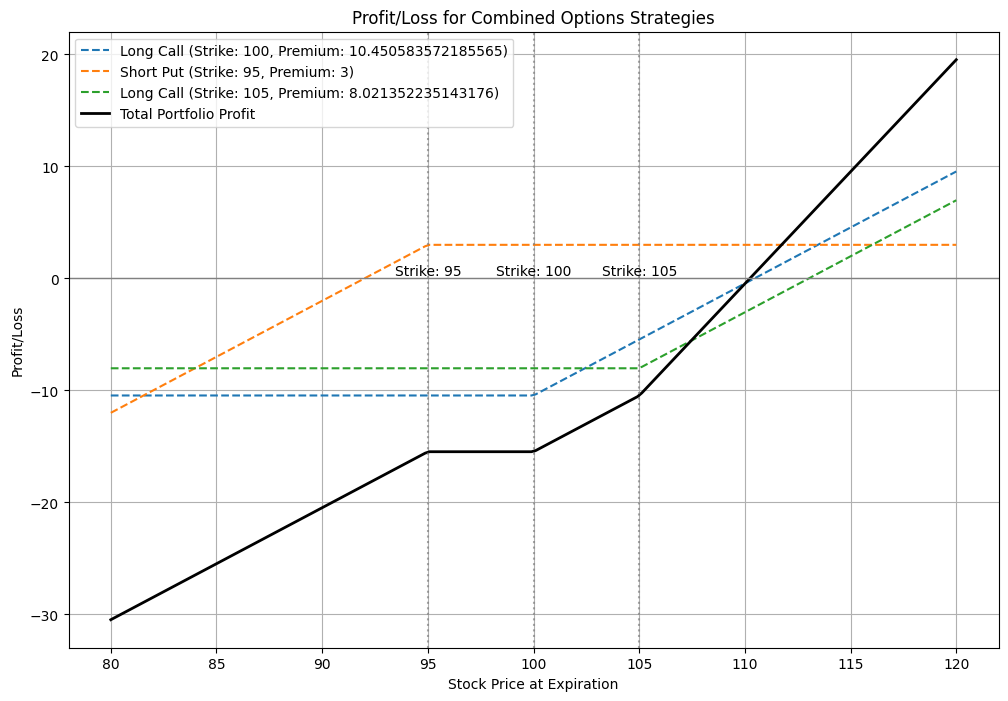

In [1]:
# %pip install tabulate

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import newton
from tabulate import tabulate

def european_option_price_and_greeks(S, E, T, r, sigma, option_type):
    """
    Calculate the price and Greeks for a European call or put option.
    """
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * E * np.exp(-r * T) * norm.cdf(d2)
        rho = T * E * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = E * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        delta = norm.cdf(d1) - 1
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * E * np.exp(-r * T) * norm.cdf(-d2)
        rho = -T * E * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Must be 'call' or 'put'.")

    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1)

    return price, delta, gamma, theta, vega, rho

def implied_volatility_objective(sigma, S, K, T, r, market_price, option_type='call'):
    """
    Objective function to find the root (implied volatility).
    """
    if option_type == 'call':
        return european_option_price_and_greeks(S, K, T, r, sigma, 'call')[0] - market_price
    elif option_type == 'put':
        return european_option_price_and_greeks(S, K, T, r, sigma, 'put')[0] - market_price

def calculate_implied_volatility(S, K, T, r, market_price, option_type='call'):
    """
    Calculate implied volatility using the Newton-Raphson method.
    """
    sigma_initial_guess = 0.2
    implied_vol = newton(implied_volatility_objective, sigma_initial_guess, args=(S, K, T, r, market_price, option_type))
    return implied_vol

def calculate_option_payoff(strategy, strike, premium, stock_prices):
    """
    Calculate the payoff for a single option based on the strategy.
    """
    if strategy == "long_call":
        payoff = np.maximum(stock_prices - strike, 0) - premium
    elif strategy == "short_call":
        payoff = -np.maximum(stock_prices - strike, 0) + premium
    elif strategy == "long_put":
        payoff = np.maximum(strike - stock_prices, 0) - premium
    elif strategy == "short_put":
        payoff = -np.maximum(strike - stock_prices, 0) + premium
    else:
        raise ValueError("Invalid strategy")
    return payoff

def plot_options_strategies(strategies, stock_price_range):
    """
    Plot the profit/loss for a combination of option strategies.
    """
    stock_prices = np.linspace(stock_price_range[0], stock_price_range[1], 200)
    total_payoff = np.zeros_like(stock_prices)
    plt.figure(figsize=(12, 8))

    for i, strategy in enumerate(strategies):
        payoff = calculate_option_payoff(strategy['type'], strategy['strike'], strategy['premium'], stock_prices)
        total_payoff += payoff
        plt.plot(stock_prices, payoff, label=f"{strategy['type'].replace('_', ' ').title()} (Strike: {strategy['strike']}, Premium: {strategy['premium']})", linestyle='--')

    plt.plot(stock_prices, total_payoff, label="Total Portfolio Profit", color='black', linewidth=2)

    for strategy in strategies:
        plt.axvline(x=strategy['strike'], color='grey', linestyle=':', alpha=0.7)
        plt.text(strategy['strike'], 0, f"Strike: {strategy['strike']}", horizontalalignment='center', verticalalignment='bottom')

    plt.axhline(0, color='gray', lw=1)
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit/Loss")
    plt.title("Profit/Loss for Combined Options Strategies")
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_options_portfolio(portfolio):
    """
    Analyze an options portfolio by calculating prices, Greeks, and plotting payout functions.
    """
    S0 = portfolio["S0"]
    T = portfolio["T"]
    r = portfolio["r"]
    strategies = portfolio["strategies"]

    results = []
    total_price = 0
    total_delta = 0
    total_gamma = 0
    total_theta = 0
    total_vega = 0
    total_rho = 0

    for strategy in strategies:
        if "sigma" in strategy and "premium" in strategy:
            raise ValueError("Cannot provide both volatility and premium. Please provide only one.")

        if "sigma" not in strategy:
            if "premium" not in strategy:
                raise ValueError("Please provide either volatility or premium for each strategy.")
            else:
                strategy["sigma"] = calculate_implied_volatility(S0, strategy["strike"], T, r, strategy["premium"], strategy["type"].split("_")[1])
        else:
            price = european_option_price_and_greeks(S0, strategy["strike"], T, r, strategy["sigma"], strategy["type"].split("_")[1])[0]
            strategy["premium"] = price

        price, delta, gamma, theta, vega, rho = european_option_price_and_greeks(S0, strategy["strike"], T, r, strategy["sigma"], strategy["type"].split("_")[1])
        
        # Multiply price by -1 for short positions
        if strategy["type"].startswith("short"):
            price *= -1
            delta *= -1
            gamma *= -1
            theta *= -1
            vega *= -1
            rho *= -1
        
        results.append([strategy["type"], strategy["strike"], strategy["sigma"], price, delta, gamma, theta, vega, rho])

        total_price += price
        total_delta += delta
        total_gamma += gamma
        total_theta += theta
        total_vega += vega
        total_rho += rho

    results.append(["Total Portfolio", "-", "-", total_price, total_delta, total_gamma, total_theta, total_vega, total_rho])

    headers = ["Strategy", "Strike", "Volatility", "Price", "Delta", "Gamma", "Theta", "Vega", "Rho"]
    print(tabulate(results, headers, floatfmt=".4f"))

    stock_price_range = (S0 * 0.8, S0 * 1.2)
    plot_options_strategies(strategies, stock_price_range)

# Example usage
portfolio = {
    "S0": 100,
    "T": 1,
    "r": 0.05,
    "strategies": [
        {"type": "long_call", "strike": 100, "sigma": 0.2},
        {"type": "short_put", "strike": 95, "premium": 3},
        {"type": "long_call", "strike": 105, "sigma": 0.2},
    ]
}

analyze_options_portfolio(portfolio)



